In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set the theme
pio.templates.default = "plotly_white"

glove = pd.read_csv('FineTune/FTGloVe.csv')
roberta = pd.read_csv('FineTune/FTRoBERTa.csv')

In [2]:
df = pd.concat([glove, roberta], axis=0)
df

/Users/jackz/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/jackz/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,Name,Runtime,Notes,State,Tags,batch_size,input_len,learning_rate,num_words,units,...,val_loss,User,Created,Sweep,dropout,embedding_dim,epochs,model,shuffle,trainable
0,bumbling-fog-76,1090,-,finished,NaN,256,56,0.0001,25000.0,104,...,0.524438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,faithful-durian-75,1230,-,finished,NaN,256,56,0.0001,25000.0,128,...,0.544966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,true-night-74,1364,-,finished,NaN,128,56,0.0001,27500.0,104,...,0.414676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cool-totem-73,1117,-,finished,NaN,256,56,0.0005,30000.0,104,...,0.369370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,blooming-jazz-72,1057,-,finished,NaN,256,56,0.0001,25000.0,104,...,0.542516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,volcanic-totem-9,5915,-,finished,NaN,128,70,0.0010,25000.0,64,...,0.253430,z1ggy0z4ggy,2024-03-18T23:26:48.000Z,NaN,0.5,NaN,3.0,BERTGRU,True,NaN
11,futile-data-27,12387,-,finished,NaN,256,70,0.0001,25000.0,128,...,0.212937,z1ggy0z4ggy,2024-04-05T18:58:50.000Z,NaN,0.5,NaN,3.0,RoBERTaO_LSTM,True,True
12,bumbling-breeze-22,8615,-,finished,NaN,256,70,0.0100,25000.0,128,...,0.250763,z1ggy0z4ggy,2024-04-02T20:50:41.000Z,NaN,0.5,NaN,5.0,RoBERTaO_LSTM,True,NaN
13,eager-pyramid-25,119907,-,crashed,NaN,256,70,0.0001,25000.0,64,...,NaN,z1ggy0z4ggy,2024-04-04T15:43:01.000Z,NaN,0.5,NaN,5.0,RoBERTa_LSTM,True,NaN


In [4]:
df = df.dropna(subset=['Test Accuracy'])

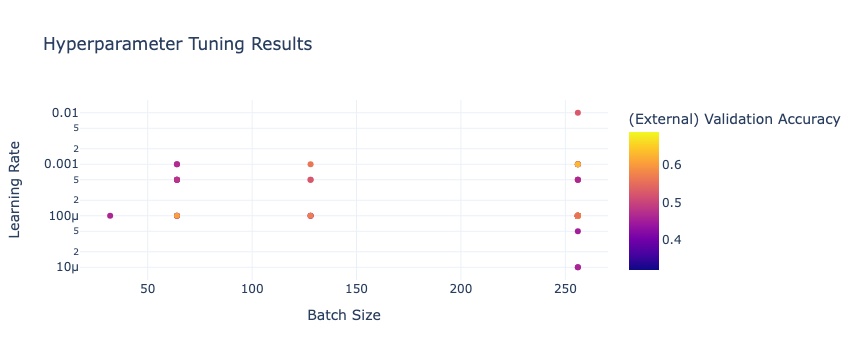

In [9]:
# Scatter plot for Batch Size vs. Learning Rate colored by Units and sized by Accuracy
fig = px.scatter(df, x='batch_size', y='learning_rate', color='(External) Validation Accuracy',
                 title='Hyperparameter Tuning Results',
                 labels={'batch_size': 'Batch Size', 'learning_rate': 'Learning Rate', 'Test Accuracy': 'Accuracy'},
                 hover_name='units', hover_data={'accuracy': True, 'units': False},
                log_y=True)  # Log scale for better visualization if needed

# Show the plot
fig.show()

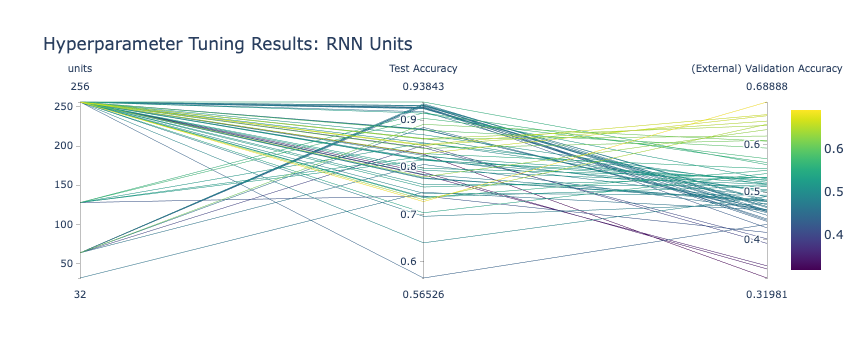

In [13]:
import plotly.graph_objects as go

import pandas as pd

import numpy as np


fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['(External) Validation Accuracy'],
                   showscale = True,
                  ),
        dimensions = list([
            dict(label = "units", values = df['batch_size']),
            dict(label = "Test Accuracy", values = df['Test Accuracy']),
            dict(label = "(External) Validation Accuracy", values = df['(External) Validation Accuracy']),
        
        ])
    )
)
fig.update_layout(
    title='Hyperparameter Tuning Results: RNN Units'
)
fig.show()

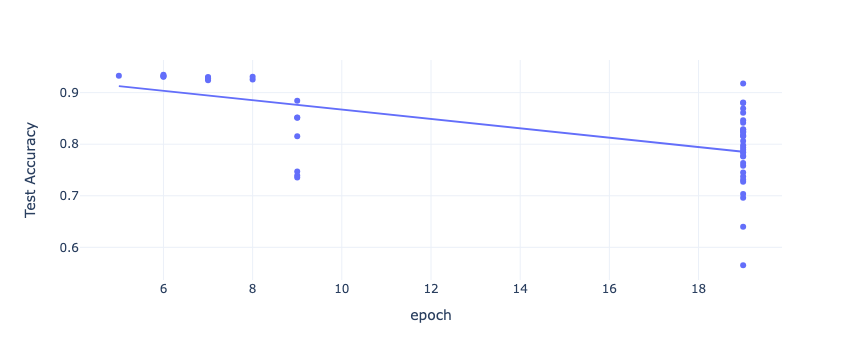

In [17]:
import plotly.express as px

fig = px.scatter(glove, x="epoch", y="Test Accuracy", trendline="ols")
fig.show()

/var/folders/dz/96cbkq4528qbsd8m568m7tqw0000gn/T/ipykernel_32141/1284981675.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



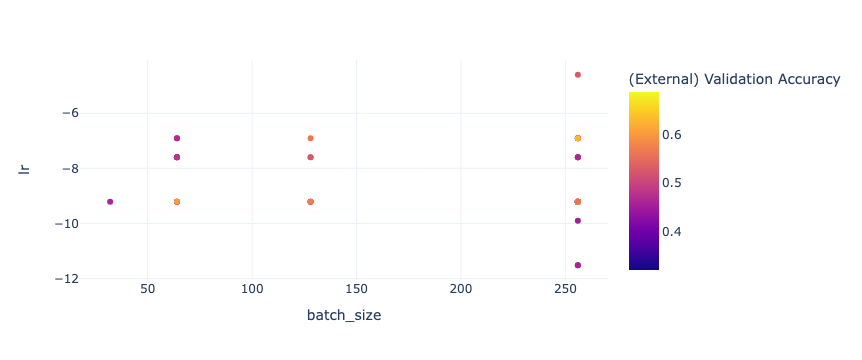

In [8]:
import plotly.express as px

df['lr'] = np.log(df['learning_rate'] + 1e-10)

fig = px.scatter(df, x='batch_size', y='lr',
              color='(External) Validation Accuracy')
fig.show()

In [15]:
df.columns

Index(['Name', 'Runtime', 'Notes', 'State', 'Tags', 'batch_size', 'input_len',
       'learning_rate', 'num_words', 'units', '(External) Validation Accuracy',
       '(External) Validation MCC', '(Internal) Validation ACC',
       '(Internal) Validation MCC', 'AUC', 'MCC', 'Test Accuracy',
       'Total Validation MCC', 'Train Accuracy', 'Training Time', 'accuracy',
       'best_epoch', 'best_val_loss', 'epoch', 'loss', 'val_accuracy',
       'val_loss', 'User', 'Created', 'Sweep', 'dropout', 'embedding_dim',
       'epochs', 'model', 'shuffle', 'trainable', 'lr'],
      dtype='object')